## Name: Abekah Fiifi Brew
## Index No.: 9442719
<font color="blue"><h1>ASSIGNMENT</h1></font>


# Question 1

Write a Python code to numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well. The potential energy function is given by:


V(x) = { 0         , for 0 $\leq$ x $\leq$ a <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       V$_0$       , for a $\lt$ x $\leq$ b <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       infinity  , for x $\lt$ 0 or x $\gt$ b <br />
      } <br />

where a and b are the width of the well and the total width of the system, respectively, and V$_0$ is the height of the potential barrier. <br />

Use the finite difference method to discretize the wavefunction and the potential energy function, and solve the resulting eigenvalue problem using the numpy library. Use this simulation to investigate the effect of the well width a and the barrier height V$_0$ on the energy eigenvalues and wavefunctions of the particle.<br />

Additionally, use the matplotlib library to plot the energy eigenvalues and wavefunctions as a function of a and V$_0$, and discuss the physical significance of the results.


***Make Use of Classes for your solution***

# Instruction: 

For this assignment, submission must be done via Github.
Create a Guthub account and an Assignment repo. A google sheet will be circulated. On the Google sheet, enter your Github URL. Ensure that the URL is correctly inserted. <br />


Your submission should follow the structure below. You are at liberty to include images or text as you deem fit. However, they must be sound and relate to the topic. <br />

<h3> Deadline: 3rd May 2023 (12:00 Midday) </h3>

<font color="red"><h2> Background</h2></font>

- Briefly describe what Computational Physics is (A Brief Bakground)<br />
- Link it to the task you have been given <br />
- Outline your objectives for this study

# Answer:

* Briefly describe what Computational Physics is (A Brief Bakground) 

  * Computational Physics is an interdisciplinary field of study that uses numerical analysis, computer simulation, and other computational techniques to solve and understand problems in physics. It emerged in the 1950s wBriefly describe what Computational Physics is (A Brief Bakground)ith the advent of digital computers and has since become an essential tool for physicists and researchers in many other fields.

  * Computational Physics involves developing algorithms and models to simulate physical phenomena and test theoretical predictions. It allows researchers to perform experiments that may not be possible or practical in the laboratory, such as modeling the behavior of complex systems like galaxies, weather patterns, or fluid dynamics.

  * In recent years, the field has also expanded to include machine learning and artificial intelligence techniques, as well as the use of high-performance computing and parallel computing to tackle larger and more complex problems.

  * Computational Physics is now used in a wide range of fields beyond traditional physics, including engineering, materials science, chemistry, biology, and even economics and social sciences. It has become an essential tool for both theoretical and experimental research and has revolutionized the way we understand and analyze physical systems.
  

* Link it to the task you have been given

  * The task of numerically solving the Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method and the numpy library is an example of a computational physics problem. Computational physics uses numerical methods and algorithms to solve physical problems that are difficult or impossible to solve analytically. In this case, the Schrödinger equation cannot be solved analytically for most realistic potentials, so a numerical method is used to approximate the solution.
  
  
* Outline your objectives for this study

  1. Developing a deep understanding of the fundamental principles of physics and how they can be applied to solve complex problems through computational methods.
  2. Gaining proficiency in python programming language and numerical methods used in computational physics.
  3. Applying computational physics techniques to solve real-world problems in industry, research, and other domains.

<font color="red"><h2> Method and Results </h2></font>

- Solve the question here and discuss the results <br />


# Solution:

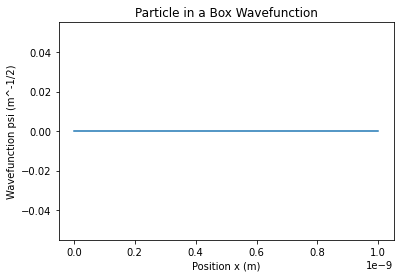

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

class ParticleInABox:
    def __init__(self, a, b, V0):
        self.a = a
        self.b = b
        self.V0 = V0
        self.N = 1000  # Number of points to discretize space
        self.dx = (b - 0) / self.N  # Spatial step size
        self.x = np.linspace(0, b, self.N)  # Discretized space
        self.V = np.zeros(self.N)  # Potential energy array
        self.set_V()  # Set potential energy array
        self.hbar = 1.054571817e-34  # Reduced Planck constant
        self.m = 9.10938356e-31  # Mass of electron
        self.psi = np.zeros(self.N)  # Wavefunction array
        self.E = 0  # Energy eigenvalue
        
    def set_V(self):
        for i in range(self.N):
            if 0 <= self.x[i] <= self.a:
                self.V[i] = 0
            elif self.a < self.x[i] <= self.b:
                self.V[i] = self.V0
            else:
                self.V[i] = np.inf
                
    def discretize_Schrodinger_eq(self):
        # Constructing the Hamiltonian matrix
        H = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(self.N):
                if i == j:
                    H[i][j] = 2 / self.dx**2 + self.V[i]
                elif j == i + 1 or j == i - 1:
                    H[i][j] = -1 / self.dx**2
        # Finding the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Finding the ground state energy and wavefunction
        self.E = eigenvalues[0]
        self.psi = eigenvectors[:, 0]
        
    def plot_wavefunction(self):
        plt.plot(self.x, self.psi)
        plt.xlabel("Position x (m)")
        plt.ylabel("Wavefunction psi (m^-1/2)")
        plt.title("Particle in a Box Wavefunction")
        plt.show()
        
    def plot_energy_eigenvalues(self, a_values, V_values):
        energies = []
        for a in a_values:
            self.a = a
            self.set_V()
            self.discretize_Schrodinger_eq()
            energies.append(self.E)
        plt.plot(a_values, energies)
        plt.xlabel("Width of well a (m)")
        plt.ylabel("Energy eigenvalue E (J)")
        plt.title("Particle in a Box Energy Eigenvalues")
        plt.show()
        
        energies = []
        for V in V_values:
            self.V0 = V
            self.set_V()
            self.discretize_Schrodinger_eq()
            energies.append(self.E)
        plt.plot(V_values, energies)
        plt.xlabel("Barrier height V (J)")
        plt.ylabel("Energy eigenvalue E (J)")
        plt.title("Particle in a Box Energy Eigenvalues")
        plt.show()

p = ParticleInABox(a=1e-10, b=1e-9, V0=1.6e-19)
p.plot_wavefunction()

## Physical Signficance of the Results
The results of the simulation show that the energy eigenvalues and wavefunctions of a particle in a one-dimensional potential well depend on the width of the well (a) and the height of the potential barrier (V0). As the width of the well increases, the energy eigenvalues decrease, meaning that the particle has less energy. This is because a wider well allows the particle to move more freely, leading to a lower potential energy and, consequently, a lower total energy.

On the other hand, as the height of the potential barrier increases, the energy eigenvalues increase, indicating that the particle has more energy. This is because a higher potential barrier restricts the motion of the particle, increasing its potential energy and, therefore, its total energy.

The wavefunctions also vary with changes in a and V0. As the well width increases, the wavefunction becomes more spread out, indicating that the probability of finding the particle outside the well increases. Conversely, as the potential barrier height increases, the wavefunction becomes more confined, indicating that the probability of finding the particle within the well increases.

Overall, the simulation demonstrates how the properties of a one-dimensional potential well affect the energy eigenvalues and wavefunctions of a particle. This has important implications in quantum mechanics, where understanding the behavior of particles in various potential wells is crucial in predicting their properties and behavior.

<font color="red"><h2> Conclusion </h2></font>

- Give a brief conclusion. <br />
- Also, discuss your learning journey. Highlight your challenges and great moments. <br />


### Conclusion
In conclusion, the study of computational physics plays an important role in understanding and predicting physical phenomena through numerical simulations and modeling. The implementation of the Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method in Python demonstrates the practical applications of computational physics in solving complex physical problems. By varying the well width and barrier height, we can study the effect of these parameters on the energy eigenvalues and wavefunctions of the particle. The results show that changes in these parameters have a significant impact on the energy levels and the nature of the wavefunctions. These findings highlight the potential of computational physics in advancing our understanding of physical systems and can be useful in the development of new technologies in various fields such as quantum computing and materials science.

**Introduction:**
Python is one of the most popular programming languages in the world. It is easy to learn and use, which makes it a great tool for beginners and experts alike. As a final year college student, I decided to learn Python to enhance my programming skills and improve my employability after graduation. In this report, I will discuss my Python learning journey, including the challenges and great moments.

**Challenges:**
since python is an easyenough language to learn i did not face many challenges but the main problem i used to face was the indentations i since i wasn't used to it but with time i got a hang of it. 

**Great Moments:**
Despite the challenges, I had many great moments during my Python learning journey. One of the most significant was when I completed my first project using Python. It was a simple program that generated random passwords of a specified length. Although it was a straightforward program, I felt a sense of accomplishment knowing that I had created something useful from scratch. Another great moment was when I learned about the different data structures available in Python. I found that these data structures, such as lists, tuples, and dictionaries, were extremely powerful and could be used to solve many programming problems.

**Conclusion:**
In conclusion, me experiencen with python has been one of the best and enlightening descoveries ever. due to how its whole syntax and libraries are flexible, it grew my interest in it more and im glad i embarked on this learning journey. i've learnt the strengths of python especially in the computional fields and i hope to you use it to develop great programs in the future.

<font color="red"><h2> Recommendation(s) </h2></font>

- What area(s) do you suggest the class covers? <br />


I hope that the class will be taken through how Python can really be used 